In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [9]:
#############################################################
##                                                         ##
##             PROBLEM 1: CANNY EDGE DETECTION             ##
##                                                         ##
#############################################################

# CANNY EDGE DETECTION

Below program will implement canny edge detector using below steps: <br/><br/>
1) compuete 1D guassian  for X direction convolution and for y Direction convolution<br/>
2) Convolves input Image with Guassian mask in x direction and we get Ix<br/>
3) Convolves input Image with Guassian mask in y direction and we get Iy<br/>
4) Convolves Ix  with Guassian Derivative in x direction and we get Ix1<br/>
5) Convolves Iy  with Guassian Derivative in y direction and we get Iy1<br/>
6) Compute the magnitude Image M by combining the x and y components<br/>
7) Computes non maxima suppression by taking the tangent and looking for neighbouring in the tangent direction
   and make that pixel to zero if  its neighbours are greater then this pixel<br/>
8) Peforms hysterisis tresholding pixels<br/>

Input Images used are:<br/><br/>
1)119082.jpg<br/>
2)65019.jpg<br/>
3)277095.jpg<br/>

In [10]:
from sympy import *
from PIL import Image
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import random
import copy
%matplotlib inline

In [11]:
def Gauss(ro,x): 
    
    # Function named 'Gauss' used for the Gaussian Mask
    
    G =  (np.exp((-(x**2))/float((2*ro**2))) / float((math.sqrt(2*pi)*ro))) 
    # G is the Gaussian Function
    
    return G

In [12]:
def Gx(ro,x):
    
    # Function named 'Gx' used for the first derivative of Gaussian Function in x direction
    
    Gx = (((-(x))*(np.exp((-(x*x))/float((2*ro*ro))))) / ((ro*ro)*(math.sqrt(2*pi)))) 
    # First derivative of Gaussian Function in x direction
    
    return Gx

def Gy(ro,y): 
    
    # Function named 'Gy' used for the first derivative of Gaussian Function in y direction
    
    Gy = (((-(y))*(np.exp((-(y*y))/float((2*ro*ro))))) / ((ro*ro)*(math.sqrt(2*pi)))) 
    # First derivative of Gaussian Function in y direction
    
    return Gy

In [13]:
def Canny(Image, ro): 
    
    # Function named 'Canny Edge Detection' used for the implementation of Canny edge detector
    
    image = cv2.imread(Image,0) 
    # Reading the path of the Gray-scale Training Image to be used in 'img'
    
    P = []
    Px = []
    Py = []
    pi = math.pi
    z = 0
    I = np.array(image) # Storing the Gray-scale Training Image into a matrix named I

    Ix = []
    Iy0 = []
    Ix1 = []
    Iy1 = []

    for j in range(-1,2):
        a = Gauss(ro,j) # sigma value used here is : ro = 2.8 (ro = 2.8 works best)
        P.append(a)  # Creating one-dimensional Gaussian mask and appending it in a matrix P

    Shape = np.shape(I)
    for i in range(Shape[0]):
        I11 = np.convolve(I[i,:], P,'same') # Convolving I with Gaussian Mask G along the rows
        Ix.append(np.array(I11))
    
    plt.imshow(Ix,cmap=cm.gray) 
    plt.title('X component of convolution with Gaussian')
    plt.show() 

    for i in range(Shape[1]):
        I12 = np.convolve(I[:,i], P,'same') # Convolving I with Gaussian Mask G down the coloumns
        Iy0.append(np.array(I12)) 
        

    
    Iy= np.transpose(Iy0)

    plt.imshow(Iy,cmap=cm.gray)
    plt.title('Y component of convolution with Gaussian')
    plt.show() 
    
    for j in range(-1,2):
        b = Gx(ro,j)
        Px.append(b) # Creating one-dimensional Gaussian mask and appending it in a matrix Px

    Shapex = np.shape(Ix)
    I13 = []
    I14 = []
    for i in range(Shapex[0]):
        I13 = (np.convolve(np.array(Ix)[i,:], Px,'same')) #Convolving I with first derivative of Gaussian in x direction
        Ix1.append(np.array(I13))
        
    plt.imshow(Ix1,cmap=cm.gray) 
    plt.title('X component of image convolved with derivative of Gaussian')
    plt.show() 

    for j in range(-1,2):
        c = Gy(ro,j)
        Py.append(c) # Creating one-dimensional Gaussian mask and appending it in a matrix Px
    Shapey = np.shape(Iy)
    Iyy = []
    for k in range(Shapey[1]):
        I14 = (np.convolve(np.array(Iy)[:,k], Py,'same')) #Convolving I with first derivative of Gaussian in y direction
        Iyy.append(np.array(I14))
        Iy1 = np.transpose(Iyy)
    
    plt.imshow(Iy1,cmap=cm.gray) 
    plt.title('Y component of image convolved with derivative of Gaussian')
    plt.show() 


    th = np.zeros((Shape[0], Shape[1]), np.float32)
    M = np.zeros((Shape[0], Shape[1]), np.float32)
    
    #M = np.sqrt(np.power(Ix1,2) + np.power(Iy1,2))
    #th =np.degrees(np.arctan2(Iy1,Ix1)) 
    
    for o in range(Shape[0]):
        for p in range(Shape[1]):
            M[o][p]=math.sqrt(((Ix1[o][p]*Ix1[o][p]) + (Iy1[o][p]*Iy1[o][p]))) #Magnitude of edge response by combining x and y components at each pixel
            th[o][p]= math.degrees(math.atan2((Iy1[o][p]),(Ix1[o][p]))) # Gradient Direction
            
    plt.imshow(M,cmap=cm.gray) 
    plt.title('Magnitude')
    plt.show() 

    Ifinal = np.copy(M) # Copying the Magnitude matrix as it is into I
    
    # Applying Non-Maxima Suppression :
    for o in range(Shape[0]-1):
        for p in range(Shape[1]-1):
            if th[o][p] > -22.5 and th[o][p] <= 22.5:
                if M[o][p] < M[o+1][p]:
                    Ifinal[o][p] = 0
            if th[o][p] > 22.5 and th[o][p] <= 67.5:
                if M[o][p] < M[o+1][p-1]:
                    Ifinal[o][p] = 0
            if th[o][p] > 67.5 and th[o][p] <= 112.5:
                if M[o][p] < M[o][p-1]:
                    Ifinal[o][p] = 0
            if th[o][p] > 112.5 and th[o][p] <= 157.5:
                if M[o][p] < M[o-1][p-1]:
                    Ifinal[o][p] = 0
            if (th[o][p] > 157.5 and th[o][p] <= 180) or (th[o][p] >= -180 and th[o][p] < -157.5):
                if M[o][p] < M[o-1][p]:
                    Ifinal[o][p] = 0
            if th[o][p] > -157.5 and th[o][p] <= -112.5:
                if M[o][p] < M[o-1][p+1]:
                    Ifinal[o][p] = 0
            if th[o][p] > -112.5 and th[o][p] <= -67.5:
                if M[o][p] < M[o][p+1]:
                    Ifinal[o][p] = 0
            if th[o][p] > -67.5 and th[o][p] <= -22.5:
                if M[o][p] < M[o+1][p+1]:
                    Ifinal[o][p] = 0

    #MAXIMA = max(Ifinal) # Computing the maximum value of Magnitude after applying non-maxima suppression so as to able to decide Lower threshold and HIgher Threshold values
    #g = max(MAXIMA)

    L = 0.6 # Lower threshold
    H = 0.7 # Higher threshold

    # Applying Hysteresis Thresholding :
    for o in range(0,Shape[0]):
        for p in range(0,Shape[1]):
            if Ifinal[o][p] < L:
                Ifinal[o][p] = 0
            if Ifinal[o][p] > H:
                Ifinal[o][p] = 255
            if Ifinal[o][p] > L and I[o][p] < H:
                for m in range(-1, 2):
                        for n in range(-1, 2):
                            if o+m > -1 and p+n > -1 and o+m < Ifinal.shape[0] and p+n < Ifinal.shape[1] and Ifinal[o+m][p+n] >= L and Ifinal[o+m][p+n] < H:
                                Ifinal[o+m][p+n] = 255
                
            
    plt.imshow(Ifinal,cmap=cm.gray) 
    plt.figure(figsize=(Shape[0],Shape[1]))
    plt.title('Canny edge detection after non-max suppression')
    plt.show()    

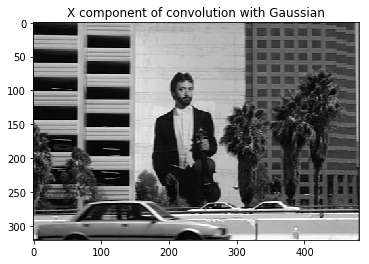

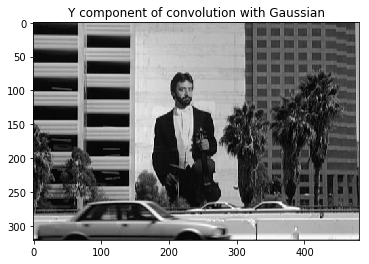

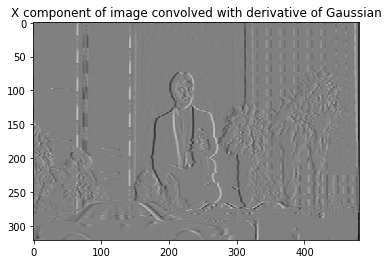

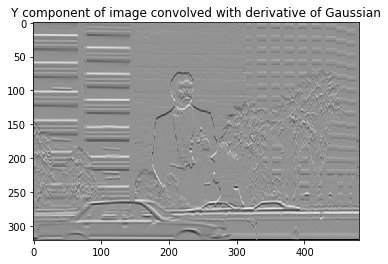

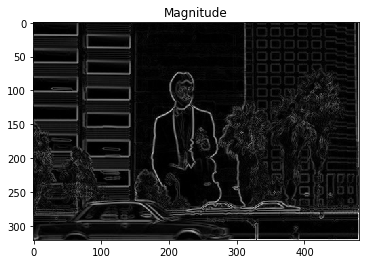

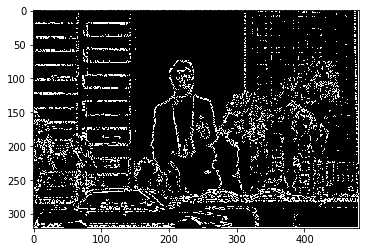

In [17]:
try:
    Canny('119082.jpg',2.8)
except MemoryError:
    pass

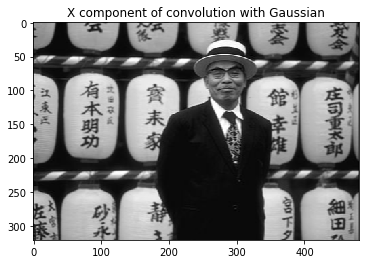

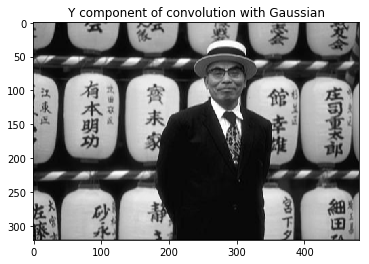

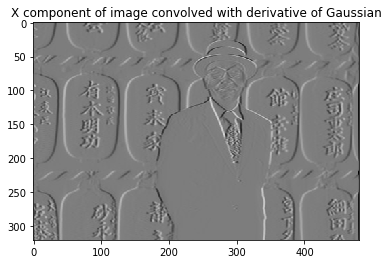

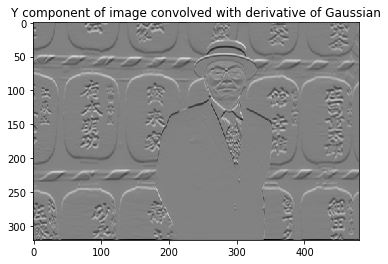

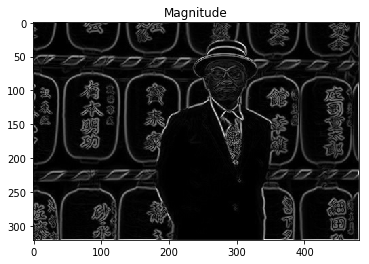

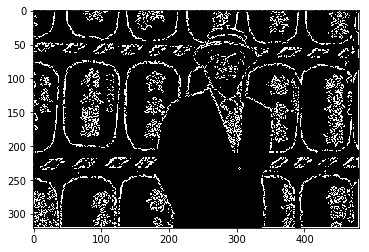

In [18]:
try:
    Canny('65019.jpg',2.8)
except:
    pass

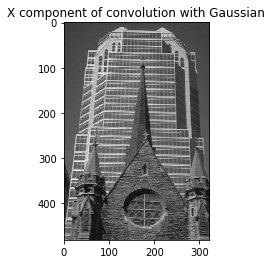

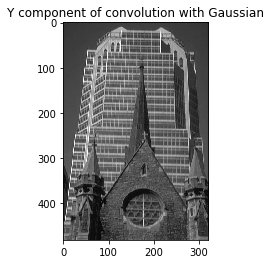

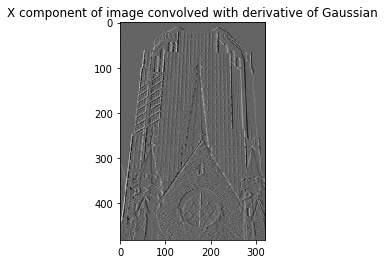

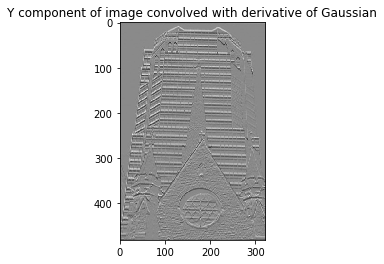

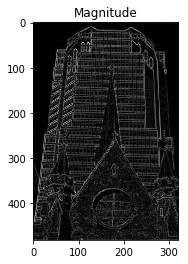

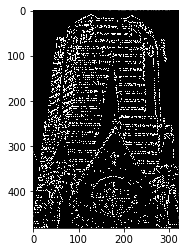

In [ ]:
try:
    Canny('277095.jpg',2.8)
except:
    pass